In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("방문자수 19_23(수정).csv")

In [3]:
data1 = data.copy()
region = data1.iloc[:, :2]
region = region.assign(col1='', col2='', col3='', col4='', col5='', col6='', col7='', col8='', col9='', col10='', col11='', col12='')

In [4]:
data1 = data1.drop(data1.columns[0], axis=1)
data1 = data1.drop(data1.columns[0], axis=1)
data1

,방문자수 19-1,방문자수 19-2,방문자수 19-3,방문자수 19-4,방문자수 19-5,방문자수 19-6,방문자수 19-7,방문자수 19-8,방문자수 19-9,방문자수 19-10,...,방문자수 22-6,방문자수 22-7,방문자수 22-8,방문자수 22-9,방문자수 22-10,방문자수 22-11,방문자수 22-12,방문자수 23-1,방문자수 23-2,방문자수 23-3
0,696582,741978.0,775665,746861,786532,889444,1060221,1539314,815551,883643,...,2990000.0,3551243.0,4026350.0,2975029.0,3321197.0,2602272.0,2529498.0,2876665.0,2718362.0,2999758.0
1,2112538,2179394.0,2772843,2125210,2300105,2466090,2710265,3327273,2855453,2638383,...,1244150.0,1514965.0,1745926.0,1118488.0,1253871.0,854915.0,920543.0,901829.0,880512.0,848900.0
2,2181409,2217946.0,2751359,2032502,2218640,2418354,2744410,3422557,2879305,2564137,...,967369.0,1228212.0,1264125.0,1095333.0,1130337.0,988903.0,847918.0,1024499.0,848962.0,924943.0
3,2538092,2553697.0,2744947,2030935,2305446,2507693,2901443,4356849,2767816,2493071,...,970128.0,1268362.0,1424061.0,1078454.0,1095231.0,864314.0,746897.0,874395.0,754208.0,975015.0
4,815823,807114.0,822741,713977,791667,813621,982952,1405017,948057,907332,...,2189126.0,2630076.0,3005110.0,2007349.0,2528720.0,1917300.0,1894441.0,1914417.0,1913547.0,1670923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,823671,821839.0,1009464,950458,1043778,938264,963807,940902,1019203,973471,...,1267337.0,1469336.0,1548654.0,1440008.0,1524121.0,1209903.0,940036.0,1065596.0,939855.0,1250775.0
224,449843,598113.0,708537,661400,777842,809041,910731,1125719,891388,794626,...,485260.0,509548.0,494713.0,540892.0,590890.0,466214.0,422266.0,445057.0,407978.0,519287.0
225,1101215,1162639.0,1430693,1254046,1415319,1266298,1333298,1391666,1461576,1328349,...,1086448.0,1143720.0,1111924.0,1219406.0,1178951.0,1057783.0,878049.0,936543.0,888681.0,1125751.0
226,475244,613806.0,574337,685516,846620,728714,718902,1041877,709245,856893,...,9888532.0,10458453.0,10178983.0,11316693.0,10811416.0,10008860.0,9719088.0,10100852.0,9436899.0,11850391.0


In [5]:
data1 = data1.transpose()

In [6]:
for col in data1.columns:
    
    start_date = pd.Timestamp(year=2019, month=1, day=1)
    end_date = pd.Timestamp(year=2023, month=3, day=1)
    idx = pd.date_range(start=start_date, end=end_date, freq='MS')
    region_data = pd.DataFrame({col: data1[col].values}, index=idx)
    
    # 시계열 분해(덧셈 분해)
    decomposition = seasonal_decompose(region_data, model='additive', period=12)
    a = decomposition.seasonal.values[0:12]
    a = a.transpose()
    region.loc[col, 'col1':'col12'] = decomposition.seasonal.values[0:12]

In [7]:
#min-max 스케일링 진행
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

df = region.copy()
df.iloc[:,2:] = df.iloc[:,2:].apply(normalize, axis=0)

In [8]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

month = ["1","2","3","4","5","6","7","8","9","10","11","12"]

In [13]:
#클러스터링 진행
for_cluster = df.drop(df.columns[0], axis=1)
for_cluster = for_cluster.drop(for_cluster.columns[0], axis=1)

cluster_n = 4

kmeans = KMeans(n_clusters=cluster_n, n_init=1)
kmeans.fit(for_cluster)

df['cluster'] = kmeans.labels_

In [14]:
for_cluster

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,cluster
0,0.682136,0.807787,0.615682,0.602856,0.229635,0.556251,0.864649,0.771442,0.29742,0.232228,0.190755,0.408934,1
1,0.538924,0.673271,0.555386,0.494376,0.199598,0.479993,0.848237,0.689387,0.512429,0.384182,0.303175,0.496539,0
2,0.574904,0.683852,0.554508,0.491953,0.19101,0.446991,0.845852,0.627691,0.494622,0.361492,0.288767,0.530328,0
3,0.548986,0.674926,0.49784,0.455261,0.174688,0.500371,0.878654,1.0,0.437543,0.348637,0.265338,0.518589,0
4,0.673572,0.79987,0.601409,0.588356,0.243755,0.513115,0.823487,0.64454,0.337884,0.244918,0.231523,0.449673,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.603853,0.777752,0.66783,0.605285,0.246647,0.512917,0.782091,0.416649,0.460762,0.278221,0.266201,0.476493,1
224,0.588489,0.775865,0.649925,0.58194,0.20108,0.457426,0.800822,0.505253,0.453344,0.302962,0.277811,0.465414,1
225,0.597509,0.765472,0.672917,0.595266,0.223481,0.503714,0.778349,0.400067,0.482062,0.295014,0.276398,0.480533,1
226,0.917734,0.942225,0.935481,0.83424,0.693006,0.540305,0.761276,0.308138,0.268719,0.05762,0.040276,0.125451,3


In [32]:
for_cluster.loc[59]

col1       0.665149
col2       0.821922
col3       0.715571
col4       0.594288
col5       0.254309
col6       0.387169
col7       0.763725
col8       0.367805
col9       0.432941
col10      0.256151
col11      0.247499
col12      0.452519
cluster           1
Name: 59, dtype: object

In [22]:
def plot_cluster_seasonal_trends(cluster_data, cluster_label):
    cluster = cluster_data[cluster_data['cluster'] == cluster_label]
    
    fig, ax = plt.subplots(figsize=(12,6))
    for city in cluster.index:
        city_seasonal_trend = cluster.loc[city].iloc[2:-1]
        sns.lineplot(x=city_seasonal_trend.index, y=city_seasonal_trend.values, label=city, alpha=0.7)
    
    plt.title(f'Seasonal Trend for Cluster {cluster_label}')
    plt.xlabel('Month')
    plt.ylabel('Seasonal Trend')
    ax.get_legend().remove()
    plt.show()

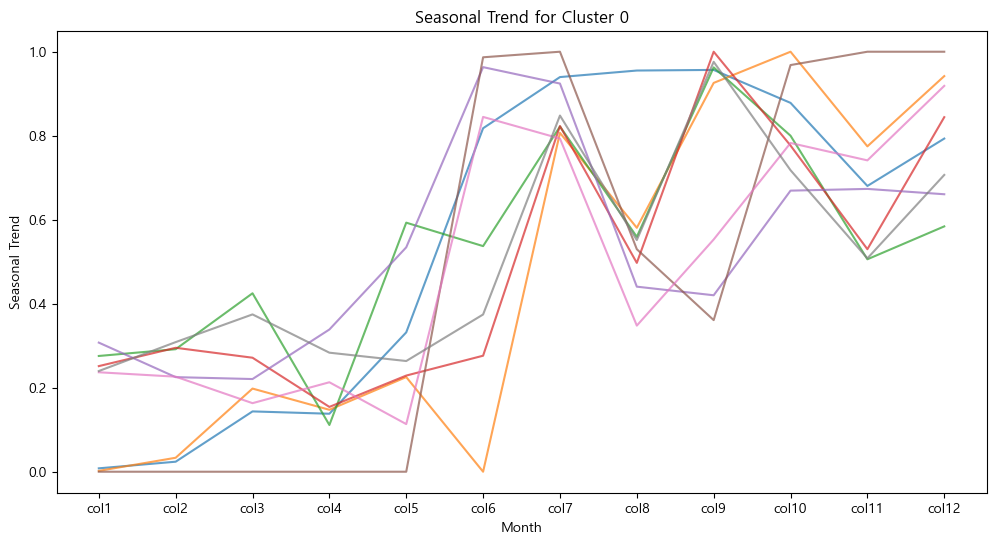

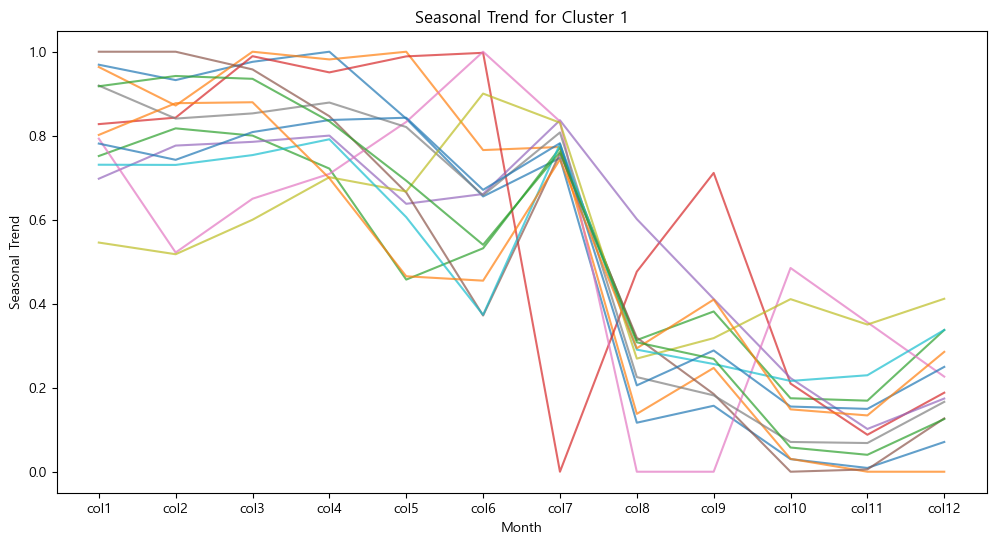

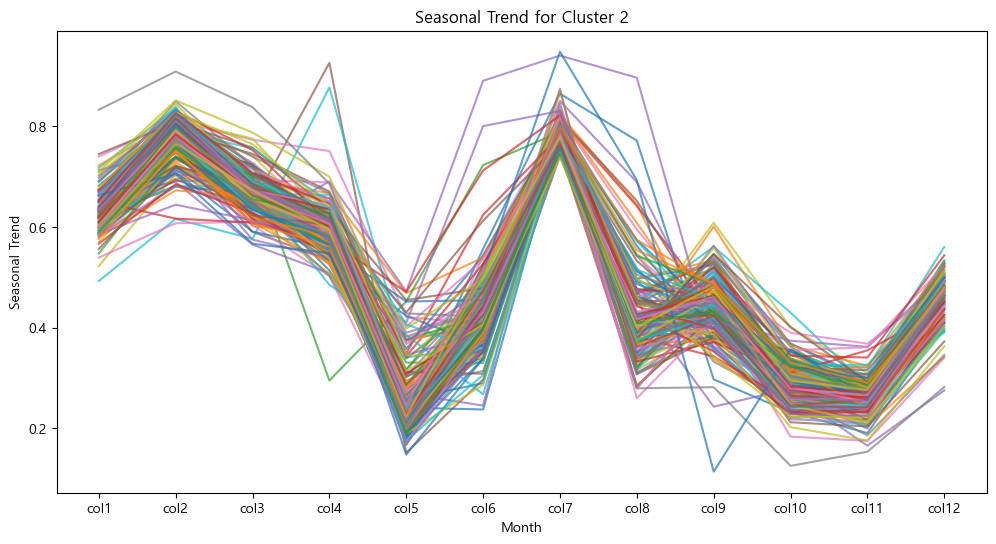

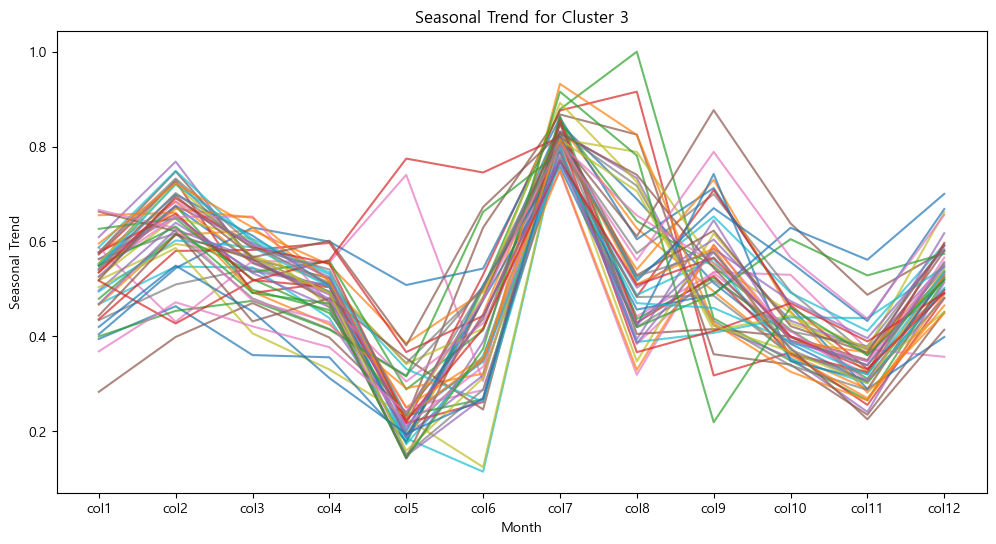

In [23]:
for i in range(cluster_n):
    plot_cluster_seasonal_trends(df, i)

In [26]:
cluster_labels = kmeans.fit_predict(for_cluster)

# 실루엣 계수 계산
silhouette_avg = silhouette_score(for_cluster, cluster_labels)

print(silhouette_avg)

0.7201601554552336
